r: [1.00000000e-10 2.00200200e+03 4.00400400e+03 6.00600601e+03
 8.00800801e+03 1.00100100e+04 1.20120120e+04 1.40140140e+04
 1.60160160e+04 1.80180180e+04 2.00200200e+04 2.20220220e+04
 2.40240240e+04 2.60260260e+04 2.80280280e+04 3.00300300e+04
 3.20320320e+04 3.40340340e+04 3.60360360e+04 3.80380380e+04
 4.00400400e+04 4.20420420e+04 4.40440440e+04 4.60460460e+04
 4.80480480e+04 5.00500501e+04 5.20520521e+04 5.40540541e+04
 5.60560561e+04 5.80580581e+04 6.00600601e+04 6.20620621e+04
 6.40640641e+04 6.60660661e+04 6.80680681e+04 7.00700701e+04
 7.20720721e+04 7.40740741e+04 7.60760761e+04 7.80780781e+04
 8.00800801e+04 8.20820821e+04 8.40840841e+04 8.60860861e+04
 8.80880881e+04 9.00900901e+04 9.20920921e+04 9.40940941e+04
 9.60960961e+04 9.80980981e+04 1.00100100e+05 1.02102102e+05
 1.04104104e+05 1.06106106e+05 1.08108108e+05 1.10110110e+05
 1.12112112e+05 1.14114114e+05 1.16116116e+05 1.18118118e+05
 1.20120120e+05 1.22122122e+05 1.24124124e+05 1.26126126e+05
 1.28128128e+05 1.301

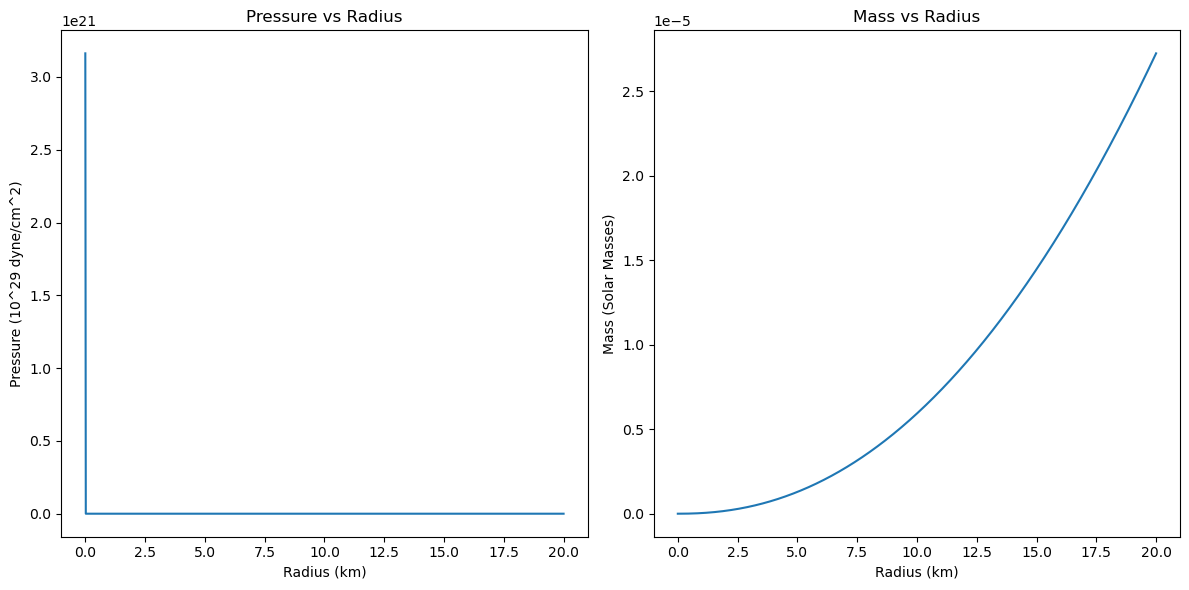

Final mass: 0.00 solar masses
Final radius: 20.00 km


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-8  # cm^3 g^-1 s^-2
c = 2.99792458e10  # cm s^-1
K = 1.0e13  # cm^5/g/s^2
gamma = 2.5
rho_c = 1.0e15  # g/cm^3 (central density)
P_c = K * rho_c**gamma  # central pressure

def tov_equations(r, y):
    P, M = y
    if P <= 0:
        return [0, 0]
    rho = (P / K)**(1/gamma)
    dPdr = -G * (rho + P/c**2) * (M + 4 * np.pi * r**3 * P / c**2) / (r**2 * (1 - 2 * G * M / (r * c**2)))
    dMdr = 4 * np.pi * r**2 * rho
    return [dPdr, dMdr]

r_max = 20e5  # cm
r_points = 1000
r = np.linspace(1e-10, r_max, r_points)
initial_conditions = [P_c, 0]  # [P(r=0), M(r=0)]

solution = solve_ivp(tov_equations, [1e-10, r_max], initial_conditions, t_eval=r, method='RK45')

r = solution.t
P = solution.y[0]
M = solution.y[1]

print(f'r: {r}')
print(f'P: {P}')
print(f'M: {M}')

# Check if there are any points where P <= 0
if np.any(P <= 0):
    surface_index = np.where(P <= 0)[0][0]
else:
    surface_index = len(r) - 1  # Use the last index

radius = r[:surface_index+1]
pressure = P[:surface_index+1]
mass = M[:surface_index+1]

print(f'radius: {radius}')
print(f'pressure: {pressure}')
print(f'mass: {mass}')

if len(mass) == 0 or len(radius) == 0:
    print('No valid points found for mass or radius.')
else:
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(radius / 1e5, pressure / 1e29)
    plt.xlabel('Radius (km)')
    plt.ylabel('Pressure (10^29 dyne/cm^2)')
    plt.title('Pressure vs Radius')

    plt.subplot(122)
    plt.plot(radius / 1e5, mass / 1.98847e33)
    plt.xlabel('Radius (km)')
    plt.ylabel('Mass (Solar Masses)')
    plt.title('Mass vs Radius')

    plt.tight_layout()
    plt.show()

    final_mass = mass[-1] / 1.98847e33  # Solar masses
    final_radius = radius[-1] / 1e5  # km
    print(f'Final mass: {final_mass:.2f} solar masses')
    print(f'Final radius: {final_radius:.2f} km')
